# Making Words-Network

Implement social network for making graph of words connection in the Hoax corpus

In [84]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

H = nx.Graph()
F = nx.Graph()


## Remove Stopwords + lowercase

### Hoax Corpus

In [85]:
filehoax = open('all_hoax.txt').read()
hoaxlow = filehoax.lower()
open('all_hoax_low.txt', 'w').write(hoaxlow)

48224

In [86]:
#removing stopwords

f1 = open('all_hoax_low.txt', 'r')
f2 = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3 = open("all_hoax_stprmvd.txt","w")
first_words=[]
second_words=[]
for line in f1:
    words = line.split()
    for w in words:
        first_words.append(w)

for line in f2:
    w = line.split()
    for i in w:
        second_words.append(i)


for word1 in first_words :
    for word2 in second_words:
        if word1 == word2:
            while True:
                try:
                    first_words.remove(word2)
                except:
                    break
            

for word in first_words:
    f3.write(word)
    f3.write(' ')

f1.close()
f2.close()
f3.close()

  

### Facts Corpus

In [87]:
filefacts = open('all_facts.txt').read()
factslow = filefacts.lower()
open('all_facts_low.txt', 'w').write(factslow)

101170

In [88]:
#removing stopwords

f1f = open('all_facts_low.txt', 'r')
f2f = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3f = open("all_facts_stprmvd.txt","w")
first_wordsf=[]
second_wordsf=[]
for line in f1f:
    words = line.split()
    for w in words:
        first_wordsf.append(w)

for line in f2f:
    w = line.split()
    for i in w:
        second_wordsf.append(i)


for word1 in first_wordsf :
    for word2 in second_wordsf:
        if word1 == word2:
            while True:
                try:
                    first_wordsf.remove(word2)
                except:
                    break
            

for word in first_wordsf:
    f3f.write(word)
    f3f.write(' ')

f1f.close()
f2f.close()
f3f.close()

  

## Remove symbol & number

### Hoax Corpus

In [89]:
import re
string = open('all_hoax_stprmvd.txt').read()
new_str = re.sub('[^a-zA-Z\n]', ' ', string)
open('all_hoax_nosym.txt', 'w').write(new_str)

33858

### Facts Corpus

In [90]:
stringf = open('all_facts_stprmvd.txt').read()
new_strf = re.sub('[^a-zA-Z\n]', ' ', stringf)
open('all_facts_nosym.txt', 'w').write(new_strf)

72008

## Stemming

### Hoax Corpus

In [91]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

hoax = open('all_hoax_nosym.txt').read()
hoax_stemmed = stemmer.stem(doc)
open('all_hoax_stemmed.txt', 'w').write(doc_stemmed)

29740

### Facts Corpus

In [92]:
fact = open('all_facts_nosym.txt').read()
fact_stemmed = stemmer.stem(fact)
open('all_facts_stemmed.txt', 'w').write(fact_stemmed)

57831

## Add Edges to network

### Hoax

In [93]:
berita = open("all_hoax_stemmed.txt","r").read()

words = berita.split()
i = 0
for idx in range(1, len(words)):
    #print(words[idx-1], words[idx])
    H.add_edge(words[idx-1], words[idx])
    i += 1
print(i)


4801


In [94]:
len(H.edges())

4009

### Facts

In [95]:
beritaf = open("all_facts_stemmed.txt","r").read()

wordsf = beritaf.split()
i = 0
for idx in range(1, len(wordsf)):
    #print(words[idx-1], words[idx])
    F.add_edge(wordsf[idx-1], wordsf[idx])
    i += 1
print(i)


8856


In [96]:
len(F.edges())

7234

## Hoax Analysis

## Draw Graph

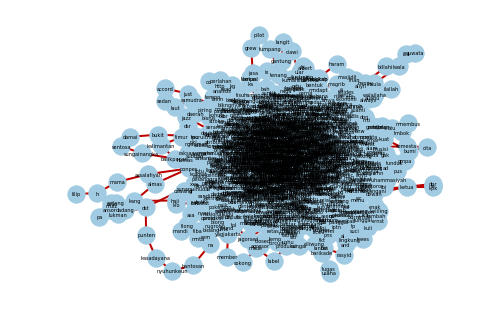

In [97]:
labels = {}

for idx in range(len(words)):
    labels[idx] = words[idx]
    
pos = nx.spring_layout(H)
nx.draw(H,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("hoax_graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()

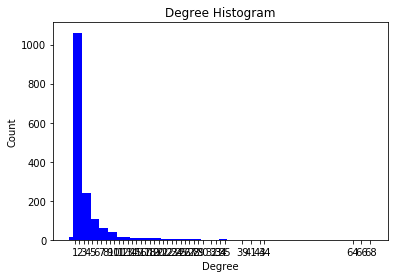

In [98]:
import collections
degree_sequence = sorted([d for n, d in H.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)[0]
pos = nx.spring_layout(H)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [99]:
H.edges()

EdgeView([('ungkap', 'jaring'), ('jaring', 'saracen'), ('jaring', 'libat'), ('saracen', 'berita'), ('saracen', 'foto'), ('saracen', 'anggota'), ('saracen', 'lebih'), ('saracen', 'sindikat'), ('saracen', 'isu'), ('berita', 'sedot'), ('berita', 'tengah'), ('berita', 'lidi'), ('berita', 'artikel'), ('berita', 'foto'), ('berita', 'media'), ('berita', 'sementara'), ('berita', 'memang'), ('berita', 'motor'), ('berita', 'dgn'), ('berita', 'ini'), ('berita', 'begini'), ('berita', 'jakarta'), ('berita', 'hoax'), ('berita', 'portal'), ('berita', 'online'), ('berita', 'turun'), ('berita', 'heboh'), ('berita', 'alipay'), ('berita', 'jgn'), ('berita', 'seperti'), ('berita', 'muat'), ('berita', 'lengkap'), ('berita', 'sekarang'), ('berita', 'buruk'), ('berita', 'belum'), ('berita', 'web'), ('berita', 'sebar'), ('berita', 'wib'), ('berita', 'siar'), ('berita', 'teman'), ('berita', 'jangan'), ('berita', 'informasi'), ('berita', 'orang'), ('sedot', 'perhati'), ('perhati', 'pihak'), ('perhati', 'beberap

In [100]:
len(H.nodes())

1834

In [101]:
sorted(H.degree(), key = lambda x: int(x[1]), reverse = True)

[('pesan', 68),
 ('ini', 66),
 ('orang', 64),
 ('sebut', 44),
 ('hati', 43),
 ('kirim', 41),
 ('anda', 39),
 ('berita', 35),
 ('dan', 35),
 ('malam', 34),
 ('anak', 33),
 ('makan', 32),
 ('warga', 30),
 ('jalan', 29),
 ('d', 29),
 ('sebar', 28),
 ('milik', 28),
 ('video', 28),
 ('tinggal', 27),
 ('edar', 26),
 ('teman', 26),
 ('jakarta', 26),
 ('informasi', 25),
 ('itu', 25),
 ('jam', 25),
 ('bagi', 25),
 ('indonesia', 24),
 ('pagi', 23),
 ('guna', 23),
 ('darah', 23),
 ('motor', 23),
 ('bbm', 23),
 ('nya', 22),
 ('benar', 22),
 ('ibu', 22),
 ('jl', 21),
 ('kontak', 21),
 ('cepat', 20),
 ('hari', 20),
 ('tahun', 20),
 ('tdk', 20),
 ('info', 20),
 ('broadcast', 20),
 ('makam', 20),
 ('yg', 19),
 ('tolong', 19),
 ('whatsapp', 19),
 ('cctv', 19),
 ('daging', 19),
 ('nama', 18),
 ('facebook', 18),
 ('ada', 18),
 ('online', 18),
 ('isi', 18),
 ('temu', 18),
 ('karena', 18),
 ('perintah', 18),
 ('bukti', 18),
 ('di', 17),
 ('lain', 17),
 ('dalam', 17),
 ('tulis', 17),
 ('dgn', 17),
 ('harap'

## Degree Centrality

In [102]:
from operator import itemgetter
#degree centrality
deg_cen = nx.degree_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_degcen = sorted(deg_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degcen[:20]:
    print(b)

Top 20 nodes by degree centrality:
('pesan', 0.03709765411893071)
('ini', 0.03600654664484451)
('orang', 0.03491543917075832)
('sebut', 0.02400436442989634)
('hati', 0.023458810692853244)
('kirim', 0.022367703218767045)
('anda', 0.02127659574468085)
('berita', 0.019094380796508454)
('dan', 0.019094380796508454)
('malam', 0.018548827059465357)
('anak', 0.018003273322422256)
('makan', 0.01745771958537916)
('warga', 0.01636661211129296)
('jalan', 0.015821058374249863)
('d', 0.015821058374249863)
('sebar', 0.015275504637206764)
('milik', 0.015275504637206764)
('video', 0.015275504637206764)
('tinggal', 0.014729950900163664)
('edar', 0.014184397163120567)


## Betweenness Centrality 

In [103]:
#betweenness centrality
bet_cen = nx.betweenness_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_betcen = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betcen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('orang', 0.10275024503087979)
('ini', 0.09957022228176751)
('pesan', 0.09776054495119668)
('hati', 0.06255626828653134)
('sebut', 0.04934452357908106)
('kirim', 0.04281780423180424)
('malam', 0.03729701025875)
('anda', 0.03677947315054884)
('berita', 0.036711636465178)
('anak', 0.03367744490024271)
('di', 0.031691809116735845)
('dan', 0.03130947803308359)
('tinggal', 0.03099951198240431)
('makan', 0.02957738667827899)
('milik', 0.029528645565036454)
('warga', 0.029280496434460263)
('itu', 0.02801498078706548)
('sebar', 0.02787556151963371)
('jalan', 0.027037597349526172)
('jakarta', 0.02667825167876058)


## Closeness Centrality

In [104]:
#closeness centrality
clo_cen = nx.closeness_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_clocen = sorted(clo_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by closeness centrality:")
for b in sorted_clocen[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('pesan', 0.3351618211738892)
('orang', 0.33236627379873074)
('ini', 0.33212538503352057)
('sebut', 0.3132797812339771)
('hati', 0.31258526603001363)
('kirim', 0.3068809643395279)
('berita', 0.3045356371490281)
('sebar', 0.30257510729613735)
('teman', 0.30143068574247656)
('anda', 0.3006396588486141)
('malam', 0.3004425504015735)
('bagi', 0.3004425504015735)
('itu', 0.29717898832684825)
('guna', 0.29689018464528666)
('makan', 0.2959793315033102)
('jalan', 0.2948841698841699)
('video', 0.2945524666559537)
('milik', 0.2937970828658439)
('kontak', 0.29365587952579303)
('anak', 0.2923911309618759)


In [105]:
nx.write_gexf(H, "hoax_test.gexf")

## Facts Analysis

## Draw Graph - Facts

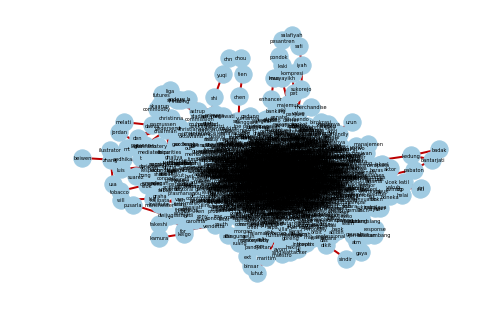

In [106]:
labels = {}

for idx in range(len(wordsf)):
    labels[idx] = wordsf[idx]
    
pos = nx.spring_layout(F)
nx.draw(F,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("fact_graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()

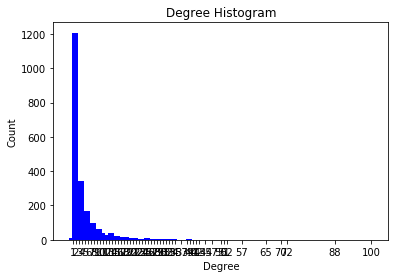

In [107]:
import collections
degree_sequence = sorted([d for n, d in F.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(F), key=len, reverse=True)[0]
pos = nx.spring_layout(F)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [108]:
F.edges()

EdgeView([('berita', 'banjir'), ('banjir', 'pagarsih'), ('banjir', 'citarum'), ('banjir', 'bunyi'), ('banjir', 'cipinang'), ('banjir', 'genang'), ('banjir', 'terima'), ('banjir', 'kirim'), ('pagarsih', 'bandung'), ('bandung', 'edar'), ('bandung', 'solobalapan'), ('bandung', 'ka'), ('bandung', 'akhir'), ('bandung', 'tutup'), ('bandung', 'hotel'), ('bandung', 'acara'), ('bandung', 'barudak'), ('bandung', 'gelar'), ('bandung', 'kota'), ('bandung', 'ini'), ('bandung', 'sukses'), ('bandung', 'event'), ('bandung', 'karena'), ('bandung', 'di'), ('edar', 'surat'), ('edar', 'aplikasi'), ('edar', 'paru'), ('edar', 'luas'), ('edar', 'kolase'), ('edar', 'lama'), ('edar', 'situs'), ('edar', 'foto'), ('edar', 'rakyat'), ('edar', 'pesan'), ('edar', 'beranta'), ('edar', 'media'), ('edar', 'dki'), ('edar', 'senin'), ('edar', 'orang'), ('edar', 'narkoba'), ('edar', 'ungkap'), ('edar', 'antisipasi'), ('edar', 'akun'), ('edar', 'pasar'), ('surat', 'warga'), ('surat', 'meter'), ('surat', 'kop'), ('surat', 

In [109]:
len(F.nodes())

2590

In [110]:
sorted(F.degree(), key = lambda x: int(x[1]), reverse = True)

[('sebut', 100),
 ('ini', 88),
 ('itu', 72),
 ('indonesia', 70),
 ('jakarta', 65),
 ('orang', 57),
 ('golkar', 52),
 ('milik', 51),
 ('jalan', 50),
 ('atur', 47),
 ('jokowi', 45),
 ('shopee', 43),
 ('tambah', 42),
 ('informasi', 41),
 ('senin', 40),
 ('serang', 40),
 ('gelar', 39),
 ('nomor', 37),
 ('kait', 35),
 ('jadi', 35),
 ('sandiaga', 35),
 ('hadir', 35),
 ('warga', 34),
 ('kartu', 33),
 ('rencana', 33),
 ('presiden', 33),
 ('usaha', 33),
 ('masyarakat', 32),
 ('aman', 32),
 ('terang', 32),
 ('akun', 32),
 ('tahan', 32),
 ('baik', 32),
 ('kembang', 32),
 ('salah', 31),
 ('juta', 31),
 ('sangka', 31),
 ('dasar', 31),
 ('hubung', 30),
 ('ribu', 30),
 ('data', 30),
 ('perintah', 30),
 ('hasil', 30),
 ('alias', 30),
 ('aku', 29),
 ('kpk', 28),
 ('kali', 28),
 ('tugas', 28),
 ('beli', 27),
 ('laku', 27),
 ('belum', 27),
 ('menteri', 27),
 ('air', 26),
 ('kondisi', 26),
 ('tinggal', 26),
 ('nama', 26),
 ('uang', 26),
 ('kelola', 26),
 ('jual', 26),
 ('id', 26),
 ('ka', 26),
 ('facebook

## Degree Centrality

In [111]:
from operator import itemgetter
#degree centrality
deg_cen = nx.degree_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_degcen = sorted(deg_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degcen[:20]:
    print(b)

Top 20 nodes by degree centrality:
('sebut', 0.03862495171881035)
('ini', 0.03398995751255311)
('itu', 0.027809965237543453)
('indonesia', 0.027037466203167246)
('jakarta', 0.025106218617226728)
('orang', 0.0220162224797219)
('golkar', 0.02008497489378138)
('milik', 0.019698725376593278)
('jalan', 0.019312475859405175)
('atur', 0.018153727307840865)
('jokowi', 0.01738122827346466)
('shopee', 0.01660872923908845)
('tambah', 0.016222479721900347)
('informasi', 0.015836230204712243)
('senin', 0.01544998068752414)
('serang', 0.01544998068752414)
('gelar', 0.015063731170336037)
('nomor', 0.01429123213595983)
('kait', 0.013518733101583623)
('jadi', 0.013518733101583623)


## Betweenness Centrality 

In [112]:
#betweenness centrality
bet_cen = nx.betweenness_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_betcen = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betcen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('sebut', 0.07889791135625894)
('ini', 0.0771847452835559)
('indonesia', 0.05595185602718117)
('itu', 0.04998287735414081)
('jakarta', 0.04252038466871275)
('jalan', 0.03713279492955884)
('golkar', 0.03059761869287665)
('orang', 0.030121052546048445)
('milik', 0.029476097056056607)
('senin', 0.023982794203992977)
('atur', 0.02379283113383295)
('informasi', 0.02318614318961334)
('serang', 0.02150556347433056)
('gelar', 0.02094212176411816)
('shopee', 0.02008927737041467)
('jokowi', 0.019998519921010056)
('hadir', 0.017547945671658436)
('nomor', 0.017436220504461756)
('internet', 0.01734945109296622)
('kartu', 0.01665690498939909)


## Closeness Centrality

In [113]:
#closeness centrality
clo_cen = nx.closeness_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_clocen = sorted(clo_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by closeness centrality:")
for b in sorted_clocen[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('ini', 0.3461692739671079)
('sebut', 0.34529207788743665)
('itu', 0.334323347107438)
('indonesia', 0.33286191823090766)
('jakarta', 0.32751423149905123)
('milik', 0.32390841986738395)
('jalan', 0.32077809441209265)
('atur', 0.31947186574531095)
('informasi', 0.3164263016377414)
('orang', 0.3157702158799854)
('jokowi', 0.31496350364963505)
('senin', 0.3147337709700948)
('jadi', 0.3145808019441069)
('golkar', 0.3143897996357013)
('kait', 0.31412278573161856)
('dasar', 0.31264340055548845)
('kpk', 0.31140245369256675)
('rencana', 0.3088024809160305)
('nomor', 0.30814091882885025)
('salah', 0.3080309339678763)


In [114]:
nx.write_gexf(F, "fact_test.gexf")